In [95]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [96]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [190]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, recall_score, confusion_matrix, classification_report
from IPython.display import display_html
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

### Область работы 2 (поиск  модели .... )

In [192]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train ='train.csv' # содержит только имя файла, без имен папок !!!

**Проверяем данные, ищем свинью**

In [193]:
df = pd.read_csv(path_train)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1294 non-null   float64
 1   volatile acidity      1294 non-null   float64
 2   citric acid           1295 non-null   float64
 3   residual sugar        1295 non-null   float64
 4   chlorides             1295 non-null   float64
 5   free sulfur dioxide   1295 non-null   float64
 6   total sulfur dioxide  1295 non-null   float64
 7   density               1295 non-null   float64
 8   pH                    1294 non-null   float64
 9   sulphates             1293 non-null   float64
 10  alcohol               1295 non-null   float64
 11  quality               1295 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 121.5 KB


In [196]:
null = df[df.isnull().any(axis = 1)]
df = df.dropna()
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000
mean,8.443377,0.500701,0.299326,2.572541,0.085473,15.333075,44.625484,0.996579,3.303354,0.678350,10.674167,5.939582
std,1.818346,0.182297,0.200514,1.368263,0.045106,10.470104,35.434022,0.001970,0.157207,0.170034,1.174266,0.955315
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,7.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.200000,0.360000,0.120000,1.900000,0.068000,7.000000,20.000000,0.995325,3.200000,0.570000,9.600000,5.000000
50%,8.100000,0.480000,0.310000,2.200000,0.078000,13.000000,34.000000,0.996600,3.300000,0.640000,10.500000,6.000000
75%,9.400000,0.620000,0.460000,2.600000,0.090000,21.000000,57.000000,0.997795,3.390000,0.760000,11.500000,7.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003200,4.010000,2.000000,14.900000,8.000000


In [197]:
df.duplicated().sum()

276

In [198]:
df = df.drop_duplicates()
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,8.326305,0.529601,0.275714,2.527734,0.088309,15.713300,47.059606,0.996748,3.308227,0.661527,10.419754,5.625616
std,1.730749,0.183901,0.195442,1.352214,0.049185,10.422607,34.510877,0.001850,0.155514,0.176689,1.087667,0.822354
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,7.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.100000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.080000,13.000000,38.000000,0.996760,3.310000,0.620000,10.200000,6.000000
75%,9.250000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997800,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003200,4.010000,2.000000,14.900000,8.000000


In [199]:
print("Ключи load_dataset:\n", df.keys())

Ключи load_dataset:
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [200]:
df['quality'] = df['quality'].apply(lambda x: 1 if x> 6 else 0)

In [201]:
y = df['quality']
X = df.drop(['quality'], axis = 1)

In [202]:
#X_train,X_test,y_train,y_test = train_test_split(X, y, stratify=y, test_size = 0.3)#, random_state = 22)
#X_test.shape

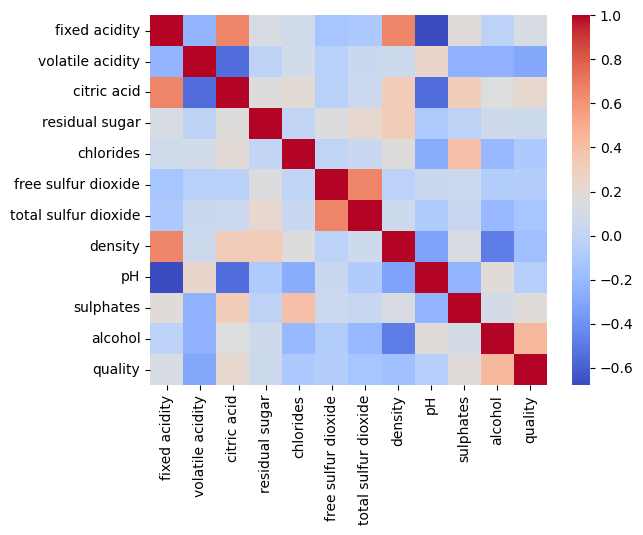

In [203]:
sns.heatmap(df.corr(), cmap = 'coolwarm')
plt.show()

In [204]:
X_train,X_test,y_train,y_test=train_test_split(X,y, stratify=y, test_size=0.3)
X_test.shape

(305, 11)

In [205]:
cv = KFold(n_splits=5, shuffle=True)

pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())]) #n_jobs=-1

n_neighbors=[10, 20, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 50, 160, 170]
p=[1, 2, 3, 4, 5]
weights=['uniform'] #,'distance']

param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler()], 
     'classifier': [KNeighborsClassifier(n_jobs=-1)],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]

grid = GridSearchCV(pipe, param_grid, cv=cv, return_train_score=True, n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [KNeighborsClassifier(n_jobs=-1)],
                          'classifier__n_neighbors': [10, 20, 30, 31, 32, 33,
                                                      34, 35, 36, 37, 38, 39,
                                                      40, 50, 160, 170],
                          'classifier__p': [1, 2, 3, 4, 5],
                          'classifier__weights': ['uniform'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler()]}],
             return_train_score=True)

In [206]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,10,7,114,147,129,144,55,159,31,46,...,53,113,56,140,101,65,128,190,2,17
mean_fit_time,0.017234,0.014665,0.012955,0.013431,0.026907,0.020709,0.026151,0.020464,0.017188,0.008782,...,0.018767,0.038175,0.013195,0.017451,0.029776,0.017444,0.043928,0.022567,0.015683,0.012836
std_fit_time,0.010712,0.014206,0.004117,0.00397,0.019042,0.013215,0.015348,0.016352,0.007434,0.002627,...,0.008765,0.014756,0.004861,0.005706,0.022622,0.007167,0.020437,0.021232,0.006155,0.002527
mean_score_time,0.07342,0.072917,0.080614,0.085029,0.137614,0.100955,0.099445,0.147659,0.055304,0.057513,...,0.11297,0.103783,0.072276,0.044497,0.142404,0.054497,0.147735,0.156377,0.053329,0.034159
std_score_time,0.022229,0.018255,0.015915,0.026278,0.035347,0.031332,0.020475,0.029951,0.017101,0.01647,...,0.033136,0.037808,0.029246,0.010031,0.039237,0.011444,0.024314,0.037794,0.00729,0.002372
param_classifier,KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),...,KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1)
param_classifier__n_neighbors,10,10,35,37,36,37,31,38,30,31,...,31,35,31,37,34,32,36,40,10,20
param_classifier__p,4,3,4,5,4,4,4,4,1,1,...,3,3,4,2,4,2,3,4,1,1
param_classifier__weights,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_preprocessing,StandardScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),StandardScaler(),...,RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),StandardScaler(),RobustScaler(),RobustScaler()
params,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...


In [207]:
grid.best_params_

{'classifier': KNeighborsClassifier(n_jobs=-1),
 'classifier__n_neighbors': 10,
 'classifier__p': 4,
 'classifier__weights': 'uniform',
 'preprocessing': StandardScaler()}

In [208]:
model = Pipeline([('preprocessing', StandardScaler()), 
                 ('classifier', KNeighborsClassifier(n_jobs=-1, n_neighbors=31, p=1, weights='uniform'))]) #n_jobs=-1
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
model.score(X_test, y_test)

0.8661971830985915


0.8721311475409836

In [209]:
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       264
           1       0.56      0.22      0.32        41

    accuracy                           0.87       305
   macro avg       0.73      0.60      0.62       305
weighted avg       0.85      0.87      0.85       305



In [210]:

matrix_1=confusion_matrix(y_test,y_predict)
matrix_1

array([[257,   7],
       [ 32,   9]], dtype=int64)

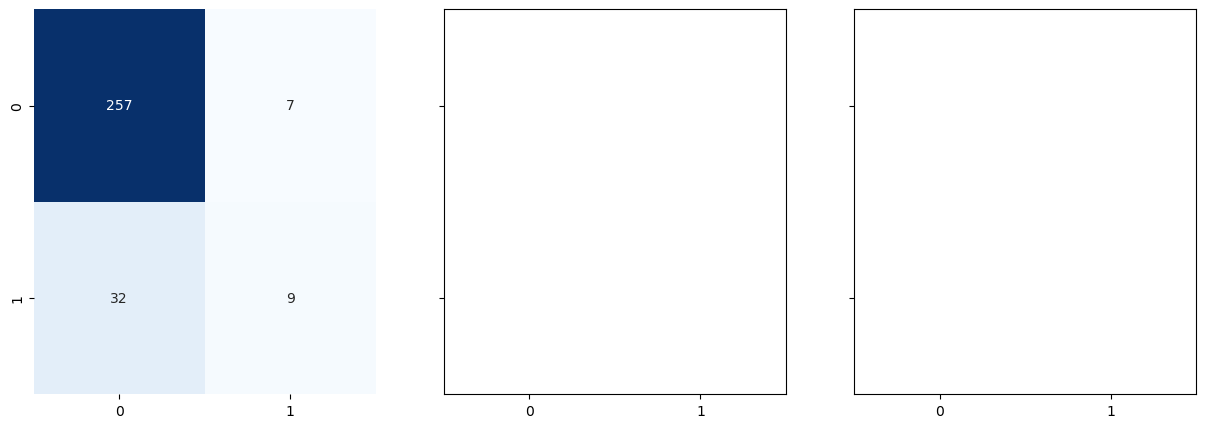

In [211]:
fig,ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
ax = plt.subplot(1, 3, 1)
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");

In [212]:
print('recall:    ', recall_score(y_test,  y_predict))
print('precision: ', precision_score(y_test,  y_predict))
print('f1:        ', f1_score(y_test,  y_predict))

recall:     0.21951219512195122
precision:  0.5625
f1:         0.3157894736842105


In [213]:
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

0.8578159645232817


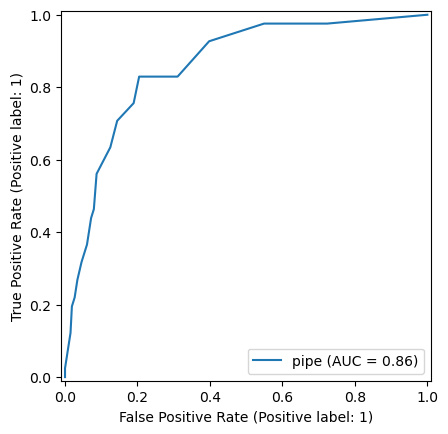

In [214]:
RocCurveDisplay.from_estimator(model, X_test, y_test, name = 'pipe');